In [2]:
import numpy as np
import matplotlib.pyplot as plt
file = open("Z.ply", "r")
#file size 2016015
lines = file.readlines()
print(np.shape(lines))
lines = np.array(lines[15:])
print(np.shape(lines))

(2016015,)
(2016000,)


In [3]:
filtered_list = []
for line in lines:
    if line != "0 0 0 0 0 0 0 0 0 0\n":
        filtered_list.append(line)

In [4]:
print(filtered_list[:5])
print(filtered_list[0])
print(np.shape(filtered_list))

# Split the data into rows and remove the newline characters
rows = [row.strip().split(' ') for row in filtered_list]

# Convert the rows to floats
data = np.array([[float(x) for x in row] for row in rows])

# Print the data
print(np.shape(data))
xyz_data =data[:, :3]
print(np.shape(xyz_data))

['-282.231 97.7889 588.214 157 119 62 107 81 42 831.786\n', '-282.383 98.327 587.774 157 119 62 107 81 42 832.226\n', '-282.534 98.8651 587.337 138 110 63 94 75 43 832.663\n', '-282.711 99.4129 586.823 135 107 60 92 73 41 833.177\n', '-280.833 92.6364 590.815 163 134 69 111 91 47 829.185\n']
-282.231 97.7889 588.214 157 119 62 107 81 42 831.786

(894630,)
(894630, 10)
(894630, 3)


기준점 주변으로 데이터 보정

In [5]:
def data_trimming(my_data, xyz_point, threshold):
    x,y,z = xyz_point
    result = []
    for data in my_data:
        if abs(data[0]-x) < threshold and abs(data[1]-y) < threshold and abs(data[2]-z) < threshold:
            result.append(data)
    return np.array(result)

SVD를 활용한 Plane Fitting

In [6]:
 def svd_plane_fitting(my_data):
    # Sample point cloud data (replace with your data)
    data = my_data
    # Center data (optional)
    centered_data = data - np.mean(data, axis=0)

    # Perform SVD on centered or original data
    U, S, Vt = np.linalg.svd(centered_data)

    # Get the last column of V (smallest singular value)
    plane_normal = Vt[-1, :]

    # Calculate plane equation coefficients (ax + by + cz + d = 0)
    a, b, c = plane_normal
    d = -np.dot(plane_normal, np.mean(data, axis=0))

    # Print plane equation
    print("Plane equation: {}x + {}y + {}z + {} = 0".format(a, b, c, d))

    # Visualize the data points
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='blue')


    # Visualize the plane (adjust based on your plane equation)
    x_grid, y_grid = np.meshgrid(range(min(data[:, 0]).astype(int), max(data[:, 0]).astype(int) + 1),
                                range(min(data[:, 1]).astype(int), max(data[:, 1]).astype(int) + 1))
    z_grid = (-a * x_grid - b * y_grid - d) / c
    # Plot the plane
    ax.plot_surface(x_grid, y_grid, z_grid, alpha=0.3, color='green')

    # Set labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Fitted Plane to Point Cloud')
    plt.show()

    return a,b,c

(2256, 3)
Plane equation: -0.012208527114529442x + 0.08601244416479857y + 0.9962192586546856z + -14.302117919506166 = 0


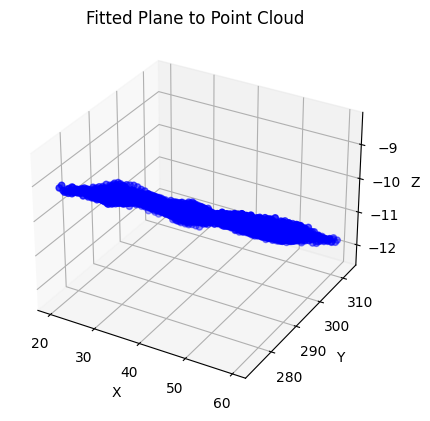

In [7]:
xyz_point = (40,293,-10)
threshold = 20

my_data = data_trimming(xyz_data, xyz_point, threshold)
print(np.shape(my_data))

normal = svd_plane_fitting(my_data)